In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.random.randn(2,4)
data2 = data * 100 
print('original', data)
print(data2)

original [[ 1.48808987  0.28043103 -0.6834228   0.92623957]
 [ 0.2590843   1.62234213 -0.17780531  0.94139167]]
[[148.80898693  28.04310251 -68.34228039  92.62395693]
 [ 25.90842999 162.23421322 -17.7805308   94.13916675]]


In [3]:
# access and mutation work like regular python lists
print(data2[1])
data2[1][1] = 88
print(data2[1])

[ 25.90842999 162.23421322 -17.7805308   94.13916675]
[ 25.90842999  88.         -17.7805308   94.13916675]


In [4]:
from_list = np.array([[1,2,3,4], [5,6,7,8]])
print(from_list)
print(from_list.shape)
print(from_list.dtype)
print(from_list.ndim)

[[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64
2


In [5]:
print(np.zeros((3,2)))

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [6]:
# can create array from native ranges
np.array([list(range(0,10,2)), list(range(1,11,2))])

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [7]:
np.random.choice(['heads', 'tails'], 10, p=[0.7, 0.3])

array(['heads', 'tails', 'heads', 'tails', 'heads', 'heads', 'heads',
       'heads', 'tails', 'tails'], dtype='<U5')

### Not exactly comprehensions, but fromfunction lets you do a lot

In [8]:
def calc(i,j):
    return i + 2 * j

print(np.fromfunction(calc, (2,5), dtype = int))

# or

print(np.fromfunction(lambda i, j: i + 2 *j, (2,5), dtype = int))


[[0 2 4 6 8]
 [1 3 5 7 9]]
[[0 2 4 6 8]
 [1 3 5 7 9]]


### Vector operations make for some clean code

In [9]:
heights_inches = np.array([73, 74, 66]) 
weights_lbs = np.array([135, 225, 201])

heights = heights_inches * 0.0254
weights = weights_lbs * 0.45

bmis = weights / (heights * heights)

print(np.column_stack((heights_inches, weights_lbs, bmis)))

[[ 73.         135.          17.66986082]
 [ 74.         225.          28.65920633]
 [ 66.         201.          32.18498173]]


### array arithmitic is stranger
This is not linear algebra

In [10]:
arr = np.array([[1,2,3,4], [5,6,7,8]])
twos = np.array([2,2,2,2])
up = np.array([1,10,100,1000])
mask = np.array([[1,0,0,1], [0,1,1,0]])

In [11]:
print(arr)
print(arr * arr)

[[1 2 3 4]
 [5 6 7 8]]
[[ 1  4  9 16]
 [25 36 49 64]]


In [12]:
print(arr * twos)

[[ 2  4  6  8]
 [10 12 14 16]]


In [13]:
print(arr * up)

[[   1   20  300 4000]
 [   5   60  700 8000]]


In [14]:
print(arr * mask)

[[1 0 0 4]
 [0 6 7 0]]


In [15]:
flip = 9 - arr
print(flip)

[[8 7 6 5]
 [4 3 2 1]]


In [16]:
print(flip >= arr)

[[ True  True  True  True]
 [False False False False]]


### slices are views,  not copies

In [17]:
numbers = np.arange(0,11)
print(numbers)
middle = numbers[4:7]
middle[:] = middle * 100
print(numbers)

[ 0  1  2  3  4  5  6  7  8  9 10]
[  0   1   2   3 400 500 600   7   8   9  10]


In [18]:
numbers = np.arange(0,11)
print(numbers)
middle = numbers[4:7].copy()
middle[:] = middle * 100
print(numbers)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]


In [19]:
three_by_three = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(three_by_three)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [20]:
print(three_by_three[1,1])

5


In [21]:
print(three_by_three[1:, 1:])

[[5 6]
 [8 9]]


In [22]:
three_by_three[2,2] = 99
print(three_by_three)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 99]]


### boolean indexing

In [23]:
three_by_three[:, 0]

array([1, 4, 7])

In [24]:
three_by_three[:, 0] == 4

array([False,  True, False])

In [25]:
three_by_three[three_by_three[:, 0] == 4]

array([[4, 5, 6]])

#### reusable conditionals might help readability

In [26]:
small_first = three_by_three[:, 0] < 4
print(small_first)
print(~small_first)

[ True False False]
[False  True  True]


In [27]:
three_by_three[small_first]

array([[1, 2, 3]])

In [28]:
three_by_three[~small_first]

array([[ 4,  5,  6],
       [ 7,  8, 99]])

### arange and reshape

In [29]:
three_by_three = np.arange(17,0,-2).reshape(3,3)
print(three_by_three)

[[17 15 13]
 [11  9  7]
 [ 5  3  1]]


### fancy indexing 
Powerful, not intuitive to me, and probably illegal in several states

In [30]:
three_by_three[[1,2]]  # makes sense rows i = 1,2

array([[11,  9,  7],
       [ 5,  3,  1]])

In [31]:
three_by_three[[1,2], [1]]  # kinda makes sense column i = 1,2  j=1 

array([9, 3])

In [32]:
three_by_three[[1,2], [1,2]]  # what the fork? i=1 intersect j=1 and i=2 intersect j=2

array([9, 1])

### reshaping

In [33]:
tall = np.arange(30).reshape(15,2)
print(tall)
print(tall.T)
print(tall.reshape(1,30))

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]]
[[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]
 [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]]


### array-oriented operations

In [44]:
np.mean(tall, axis=1)

array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
       22.5, 24.5, 26.5, 28.5])

In [47]:
tall.mean(axis=0)

array([14., 15.])

In [49]:
tall.sum(axis=0)

array([210, 225])

In [51]:
tall.sum(axis=1)

array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57])

In [52]:
tall.cumsum(axis=0)

array([[  0,   1],
       [  2,   4],
       [  6,   9],
       [ 12,  16],
       [ 20,  25],
       [ 30,  36],
       [ 42,  49],
       [ 56,  64],
       [ 72,  81],
       [ 90, 100],
       [110, 121],
       [132, 144],
       [156, 169],
       [182, 196],
       [210, 225]])

In [55]:
tall > 14

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [56]:
(tall > 14).sum()

15

In [59]:
print((tall > 14).any(), (tall > 14).all())

True False


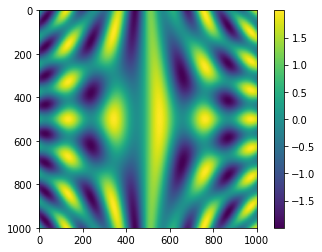

In [34]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
zs = np.sin(xs*3) + np.cos(ys*xs)
plt.imshow(zs); plt.colorbar()

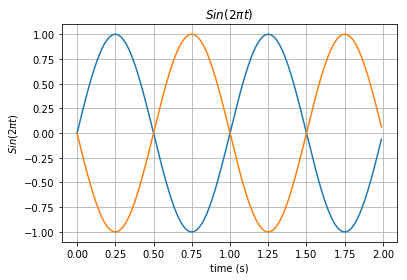

In [42]:
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 *  np.pi * t)
r = np.sin(-2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
ax.plot(t, r)

ax.set(xlabel='time (s)', ylabel='$Sin(2\pi t)$',
       title='$Sin(2\pi t)$')
ax.grid()
plt.show()

sort along an axis

In [87]:
some_numbers = np.random.randn(12).reshape(4,3)
some_numbers = abs(some_numbers * 10 // 1)
some_numbers.sort(axis=0)
some_numbers

array([[ 4.,  1.,  6.],
       [10.,  5.,  9.],
       [13., 12., 11.],
       [24., 14., 13.]])

set operations are there

In [89]:
low = [1,2,3,4,5]
high = [5,6,7,8,9]

In [83]:
print(np.intersect1d(low, high))

[5]


In [84]:
print(np.setxor1d(low, high))

[1 2 3 4 6 7 8 9]


In [85]:
print(np.in1d(low, high))

[False False False False  True]


### linear algebra is done through methods
The default operators like multiplication work element-wise    
(see above)

In [90]:
np.random.normal?

### fast pseudo RNG

In [106]:
nd = np.random.normal(loc = 10, scale=2, size=(4,4))
nd

array([[11.03251079, 13.15478914,  9.93712722,  9.58190899],
       [10.27791787, 10.62677744, 10.67679775, 11.56058698],
       [13.26807916, 10.3219594 , 10.4450654 , 10.31521538],
       [10.44764384, 10.75435159, 13.4285607 ,  9.42504594]])

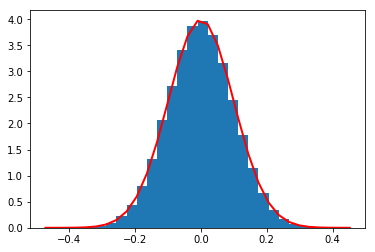

In [120]:
nd = np.random.normal(loc = 0, scale = 0.1, size = 100000)
np.mean(nd)
count, bins, ignored = plt.hist(nd, 30, normed=True)
plt.plot(bins, 1/(0.1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 0)**2 / (2 * 0.1**2) ),linewidth=2, color='r')
# plt.show()

given an 1-dimensional array, plot treats the values as y values 

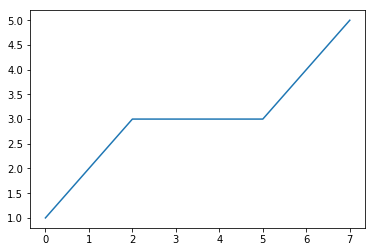

In [121]:
plt.plot([1,2,3,3,3,3,4,5])

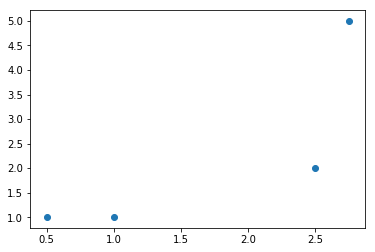

In [130]:
plt.scatter([0.5,1,2.5,2.75], [1,1,2,5])

### random walk

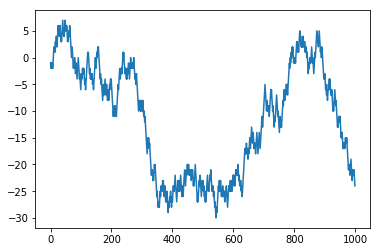

In [146]:
steps = np.random.choice([-1,1], size = 1000)
position = steps.cumsum()
plt.plot(position)